In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
from ultralytics import YOLO

import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
DEVICE

'cuda'

In [7]:
model = YOLO('yolo11l.pt')

100%|██████████| 49.0M/49.0M [00:00<00:00, 132MB/s]


In [8]:
from PIL import Image

image_path = '/content/drive/MyDrive/tumors/images/test/00022_75.jpg'

with Image.open(image_path) as img:
    width, height = img.size
    print(f'Размер изображения: {width}x{height} пикселей')

Размер изображения: 256x256 пикселей


In [10]:
results = model.train(
    data = '/content/drive/MyDrive/tumors/tumors.yaml',
    epochs=150,
    imgsz=256,
    batch=16,
    device=DEVICE
)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/drive/MyDrive/tumors/tumors.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/drive/MyDrive/tumors/labels/train... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:10<00:00, 85.01it/s] 


train: New cache created: /content/drive/MyDrive/tumors/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/tumors/labels/test... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:02<00:00, 97.03it/s] 


val: New cache created: /content/drive/MyDrive/tumors/labels/test.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.51G      1.451       2.25      1.119         20        256: 100%|██████████| 56/56 [00:19<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        223        241      0.168      0.681      0.147     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       2.3G       1.39      1.419      1.078         17        256: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        223        241      0.168      0.681      0.147     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.36G      1.419      1.395      1.091         23        256: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        223        241      0.168      0.681      0.147     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.35G      1.507      1.414      1.114         27        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]

                   all        223        241      0.168      0.681      0.147     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.34G      1.393      1.329      1.068         32        256: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        223        241      0.168      0.681      0.147     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.34G      1.343      1.276      1.055         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        223        241      0.457      0.739      0.447      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.34G      1.287      1.283      1.054         15        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]

                   all        223        241      0.323      0.237     0.0951     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.35G      1.278      1.297      1.034         26        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]

                   all        223        241      0.323      0.237     0.0951     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.36G       1.23      1.241       1.01         24        256: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        223        241      0.446      0.711      0.423      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.35G      1.267      1.244      1.043         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        223        241      0.426      0.761      0.435      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.34G      1.212      1.218       1.02         21        256: 100%|██████████| 56/56 [00:17<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.421      0.764      0.463      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.35G      1.244      1.217      1.023         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        223        241      0.467      0.702      0.454      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.34G      1.235      1.185      1.017         31        256: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        223        241      0.439      0.772      0.444      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.34G      1.215      1.237      1.021         15        256: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        223        241      0.438      0.793      0.466      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.34G      1.162      1.147     0.9996         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        223        241       0.44      0.839       0.47      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.35G      1.174      1.144      1.003         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241      0.411      0.771       0.42      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.35G      1.191      1.158      1.022         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.455      0.812      0.484      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.34G      1.196       1.16     0.9926         24        256: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        223        241      0.427      0.839      0.464      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.34G      1.148      1.148     0.9888         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        223        241      0.451      0.808       0.49      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.35G      1.164      1.133     0.9937         31        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]

                   all        223        241      0.459      0.791      0.474      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.35G      1.155      1.127      1.007         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241       0.44      0.846      0.472      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.34G      1.124      1.142     0.9845         13        256: 100%|██████████| 56/56 [00:16<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        223        241      0.414      0.772      0.465      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.35G      1.133       1.12     0.9904         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        223        241      0.443      0.703      0.445      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.34G      1.129      1.098      1.004         21        256: 100%|██████████| 56/56 [00:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        223        241      0.428      0.644      0.403      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.35G      1.152      1.093     0.9959         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.461      0.808      0.492      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.33G      1.128      1.104     0.9941         21        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        223        241      0.451        0.8      0.447       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.35G      1.082      1.078     0.9751         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        223        241      0.434      0.799      0.464      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.35G       1.08      1.078     0.9762         22        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.419      0.843      0.477      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.34G      1.071      1.059     0.9791         20        256: 100%|██████████| 56/56 [00:16<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        223        241      0.437      0.835      0.478      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.35G      1.053      1.082     0.9676         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        223        241      0.453      0.802      0.462      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.34G      1.113      1.079     0.9889         15        256: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        223        241      0.418      0.867       0.46      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.34G      1.075      1.066     0.9779         20        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        223        241      0.432      0.844      0.469      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.35G      1.055      1.022     0.9583         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        223        241      0.434      0.814      0.451      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.35G      1.041      1.021     0.9713         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        223        241      0.439      0.809      0.457      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.34G      1.072      1.037     0.9717         27        256: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        223        241      0.478      0.788      0.501      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.34G      1.038      1.009     0.9611         26        256: 100%|██████████| 56/56 [00:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        223        241      0.438      0.697      0.421      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.34G      1.049      1.005     0.9737         36        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        223        241      0.397      0.668      0.425      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.35G      1.046      1.004     0.9642         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        223        241       0.41      0.827      0.442      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.34G       1.03      1.002     0.9577         24        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.398      0.831      0.448       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.34G      1.018      1.001     0.9492         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        223        241      0.447       0.82      0.448      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.34G      1.027      1.005     0.9579         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241      0.452      0.849      0.467       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.34G      1.041     0.9901     0.9637         17        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        223        241      0.442      0.833      0.479      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.34G      1.076      1.011     0.9711         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.437      0.789      0.473      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.34G      1.021     0.9992     0.9542          9        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        223        241      0.448      0.827      0.511      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.34G     0.9782     0.9606     0.9485         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.422      0.834      0.452      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.34G      1.027     0.9754     0.9544         29        256: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.429      0.827      0.453      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.35G     0.9662      0.957     0.9489         24        256: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]

                   all        223        241      0.396      0.802      0.426      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.34G     0.9888      0.955     0.9358         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        223        241       0.43      0.814      0.428      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.34G      0.967     0.9222      0.934         19        256: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        223        241      0.456      0.792      0.448      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.35G     0.9959     0.9582     0.9492         17        256: 100%|██████████| 56/56 [00:17<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        223        241       0.42      0.785      0.421      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.35G      0.997     0.9657     0.9441         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all        223        241      0.444      0.879      0.458      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.34G     0.9822     0.9335     0.9416         24        256: 100%|██████████| 56/56 [00:16<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]

                   all        223        241      0.429      0.812      0.447      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.35G     0.9697     0.9613     0.9409         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        223        241      0.414      0.803      0.409      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.34G     0.9357     0.8948     0.9235         21        256: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        223        241      0.438      0.832      0.468      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.35G     0.9537     0.9121     0.9364         21        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        223        241      0.423      0.816      0.447      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.34G     0.9731     0.9243     0.9378         20        256: 100%|██████████| 56/56 [00:15<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        223        241      0.445      0.814       0.46      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.34G     0.9277     0.8708     0.9358         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        223        241      0.398      0.827      0.423      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.34G      0.965     0.9384     0.9486         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241      0.371       0.76      0.424      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.34G       0.98     0.8898     0.9445         16        256: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        223        241      0.398      0.722      0.419      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.34G     0.9449     0.8846      0.928         27        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.395      0.792      0.411      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.34G     0.9491     0.9113     0.9392         15        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        223        241      0.442      0.878      0.452       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.34G     0.9456     0.8879     0.9194         29        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        223        241      0.458      0.795      0.473       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.34G     0.9348     0.8675     0.9406         18        256: 100%|██████████| 56/56 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]

                   all        223        241      0.407       0.81      0.442      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.34G     0.9653     0.8446     0.9421         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241       0.43      0.809      0.435       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.34G     0.9436     0.8752     0.9268         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        223        241      0.396      0.617      0.421      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.34G     0.9328     0.8621     0.9317         20        256: 100%|██████████| 56/56 [00:16<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]

                   all        223        241      0.444      0.829      0.465      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.35G     0.9013     0.8504     0.9324         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        223        241      0.423      0.846      0.434      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.35G     0.9252     0.8269     0.9149         26        256: 100%|██████████| 56/56 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]

                   all        223        241      0.439      0.759      0.468      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.35G     0.9134     0.8113     0.9242         20        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241       0.43      0.772      0.433      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.35G     0.9448     0.8619      0.925         15        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all        223        241      0.435      0.853      0.499      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.35G     0.9146     0.8225     0.9318         21        256: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.375      0.676      0.406      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.35G     0.8952     0.8209     0.9261         26        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        223        241      0.294      0.864      0.413      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.34G     0.9085     0.8127     0.9376         21        256: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]

                   all        223        241      0.376      0.784      0.418      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.34G     0.8973     0.7793     0.9202         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.437      0.756      0.451      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.35G     0.9293     0.8252     0.9333         12        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        223        241      0.432      0.844      0.455      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.35G     0.8748     0.8173     0.9115         26        256: 100%|██████████| 56/56 [00:18<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.422      0.847      0.458      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.34G     0.9014     0.8094     0.9116         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        223        241      0.411      0.843      0.445      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.36G     0.8769     0.7794     0.9168         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]

                   all        223        241      0.399      0.828      0.441      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.34G      0.892     0.7605      0.926         28        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        223        241      0.451      0.844      0.479      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.35G     0.9072     0.7774     0.9102         11        256: 100%|██████████| 56/56 [00:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        223        241      0.378      0.787      0.424      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.34G     0.8868     0.7877     0.9095         21        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        223        241       0.39      0.818      0.432      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.34G     0.8987      0.772     0.9168         24        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        223        241      0.433      0.812      0.447      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.35G     0.9193     0.7419     0.9257         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        223        241      0.433      0.852      0.476      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.34G     0.8689     0.7577     0.9001         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        223        241      0.408      0.832      0.437      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.34G      0.868     0.7617     0.9145         19        256: 100%|██████████| 56/56 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        223        241      0.358      0.728      0.422      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.34G      0.877     0.7637     0.9166         21        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        223        241      0.429      0.627      0.406      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.34G     0.8395     0.7484     0.8977         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        223        241       0.42      0.843      0.504      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.35G      0.867     0.7351     0.9111         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        223        241       0.44      0.794      0.447      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.34G     0.8555     0.7147     0.9021         18        256: 100%|██████████| 56/56 [00:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        223        241      0.428      0.798       0.48      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.34G     0.8596     0.7044     0.9063         25        256: 100%|██████████| 56/56 [00:16<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.411      0.781      0.421      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.34G     0.8293     0.7156     0.9013         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.429      0.849      0.441      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.35G     0.8554     0.6895     0.8969         27        256: 100%|██████████| 56/56 [00:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        223        241      0.462      0.715      0.476      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.35G      0.844     0.7171     0.9058         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.423      0.811      0.443        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.34G     0.8718     0.7439     0.9145         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        223        241      0.441      0.834      0.484       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.35G     0.8465     0.7048     0.9088         22        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.389        0.8      0.418      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.34G     0.8316     0.6814     0.9101         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        223        241      0.455      0.861      0.499      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.33G     0.8157     0.6882     0.8951         25        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        223        241      0.383      0.707      0.401      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.35G      0.805     0.6397     0.8926         22        256: 100%|██████████| 56/56 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        223        241      0.416      0.822      0.452      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.34G     0.8374     0.6755     0.9114         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        223        241      0.411      0.769      0.479      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.34G     0.8314     0.6694     0.8989         25        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241      0.401      0.701      0.437      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.34G     0.8401     0.6614     0.9018         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        223        241      0.407      0.792      0.432      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.34G     0.8108     0.6581     0.8894         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241      0.433      0.826      0.467      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.35G     0.8163      0.658      0.905         17        256: 100%|██████████| 56/56 [00:18<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241      0.441      0.795      0.472      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.34G     0.8122     0.6424     0.8961         24        256: 100%|██████████| 56/56 [00:16<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        223        241      0.446      0.809      0.511      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.35G     0.7953     0.6308     0.8962         24        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.426      0.799      0.482      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.35G     0.8143     0.6446     0.8965         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        223        241      0.433      0.782       0.46      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.34G     0.8159     0.6511     0.8964         29        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        223        241      0.428      0.816      0.471      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.35G     0.8029     0.6037     0.8975         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.403      0.747      0.455      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.35G     0.8171     0.6491     0.8966         29        256: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.429      0.766      0.464      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.34G     0.8191     0.6313     0.9052         29        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.02it/s]

                   all        223        241      0.422      0.776      0.472      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.34G     0.7869     0.6285     0.8752         18        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        223        241      0.442      0.784      0.517      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.35G     0.7905     0.5984     0.8908         18        256: 100%|██████████| 56/56 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        223        241      0.414      0.753      0.453      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.34G      0.808     0.6222     0.9018         22        256: 100%|██████████| 56/56 [00:18<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241      0.429       0.78      0.453      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.35G     0.7931     0.6022     0.8823         16        256: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.97it/s]

                   all        223        241       0.44      0.777      0.479      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.34G     0.7904     0.5852      0.885         22        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all        223        241       0.43      0.786      0.485      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.34G     0.7879     0.5755     0.8871         16        256: 100%|██████████| 56/56 [00:19<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241      0.409      0.679      0.444      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.34G     0.8164     0.6007     0.8995         20        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        223        241      0.417      0.737      0.463      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.34G     0.7787     0.6045     0.8914         16        256: 100%|██████████| 56/56 [00:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        223        241      0.424      0.758      0.475      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.34G     0.7976     0.5788     0.8923         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        223        241      0.423      0.749      0.467      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.34G     0.7861     0.5859     0.8836         24        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all        223        241      0.408      0.708      0.451      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.34G     0.7546     0.5512     0.8722         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        223        241       0.41      0.686      0.437      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.34G     0.7744     0.5644     0.8929         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.439      0.707      0.463      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.34G     0.7553     0.5574      0.885         19        256: 100%|██████████| 56/56 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        223        241      0.423      0.766      0.453      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.34G     0.7432     0.5271     0.8805         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        223        241      0.438      0.744        0.5      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.34G     0.7567     0.5621     0.8791         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        223        241      0.407      0.712      0.451      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.35G      0.741     0.5209     0.8743         23        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241      0.435      0.796      0.473      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.34G     0.7264      0.522     0.8784         30        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        223        241      0.442       0.77      0.482      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.34G     0.7362     0.5044      0.882         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.438      0.737      0.494      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.35G     0.7466     0.5107     0.8753         21        256: 100%|██████████| 56/56 [00:18<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]

                   all        223        241      0.438      0.758      0.494       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.35G     0.7104     0.5048      0.863         16        256: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        223        241      0.426      0.697       0.46      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.34G      0.738     0.5142     0.8751         24        256: 100%|██████████| 56/56 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        223        241      0.434       0.74      0.474       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.34G     0.7234     0.5048     0.8783         24        256: 100%|██████████| 56/56 [00:16<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        223        241      0.449      0.731      0.502      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.34G     0.7312      0.515      0.877         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        223        241      0.429      0.731      0.486      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.34G     0.7227      0.506     0.8702         19        256: 100%|██████████| 56/56 [00:15<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        223        241       0.43      0.754      0.505      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.35G     0.7119     0.4902     0.8681         22        256: 100%|██████████| 56/56 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        223        241      0.448      0.761      0.511      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.35G     0.6904     0.4782     0.8696         16        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        223        241      0.453      0.726      0.504      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.34G     0.7108     0.5165     0.8773         22        256: 100%|██████████| 56/56 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        223        241      0.453      0.725      0.497      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.33G     0.6898     0.4832     0.8564         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.428      0.693      0.468      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.34G     0.7157     0.4838     0.8708         20        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        223        241       0.44      0.746      0.481      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.34G     0.7392     0.5047     0.8775         17        256: 100%|██████████| 56/56 [00:15<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.453      0.748      0.516      0.372


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.35G     0.6766     0.4626     0.8563         13        256: 100%|██████████| 56/56 [00:16<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        223        241      0.495      0.622      0.481      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.35G     0.6665     0.4325     0.8584         13        256: 100%|██████████| 56/56 [00:16<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        223        241      0.432      0.726      0.481      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.34G     0.6473     0.4027     0.8445         13        256: 100%|██████████| 56/56 [00:17<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        223        241      0.456      0.697      0.495      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.34G     0.6402     0.4175     0.8514         14        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        223        241      0.429      0.706      0.475      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.34G     0.6452     0.4072     0.8482         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        223        241      0.446      0.757      0.487      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.34G     0.6335     0.3874     0.8416         13        256: 100%|██████████| 56/56 [00:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        223        241      0.436      0.719      0.487       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.35G     0.6289      0.383     0.8435         12        256: 100%|██████████| 56/56 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        223        241       0.44      0.717      0.487      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.34G     0.6301     0.3823     0.8403         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241      0.445      0.705      0.483      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.35G     0.6212     0.3884     0.8461         14        256: 100%|██████████| 56/56 [00:15<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        223        241      0.451       0.72      0.486      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.35G     0.6154     0.3755     0.8358         13        256: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        223        241      0.446      0.707      0.483      0.349



150 epochs completed in 0.828 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 464 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


                   all        223        241      0.441      0.791      0.516      0.371
              negative        142        154       0.58      0.708      0.619      0.452
              positive         81         87      0.303      0.874      0.413       0.29
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


In [11]:
url = 'https://c8.alamy.com/comp/F1PN0B/film-mri-of-brain-with-brain-tumor-sagittal-plane-side-view-lateral-F1PN0B.jpg'

In [12]:
url1 = 'https://www.mdpi.com/curroncol/curroncol-29-00590/article_deploy/html/images/curroncol-29-00590-g001-550.jpg'

In [23]:
img = '/content/drive/MyDrive/tumors/images/train/100 (3).jpg'

results = model.predict(url, conf=0.3)


Found https://c8.alamy.com/comp/F1PN0B/film-mri-of-brain-with-brain-tumor-sagittal-plane-side-view-lateral-F1PN0B.jpg locally at film-mri-of-brain-with-brain-tumor-sagittal-plane-side-view-lateral-F1PN0B.jpg
image 1/1 /content/film-mri-of-brain-with-brain-tumor-sagittal-plane-side-view-lateral-F1PN0B.jpg: 256x256 1 negative, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)


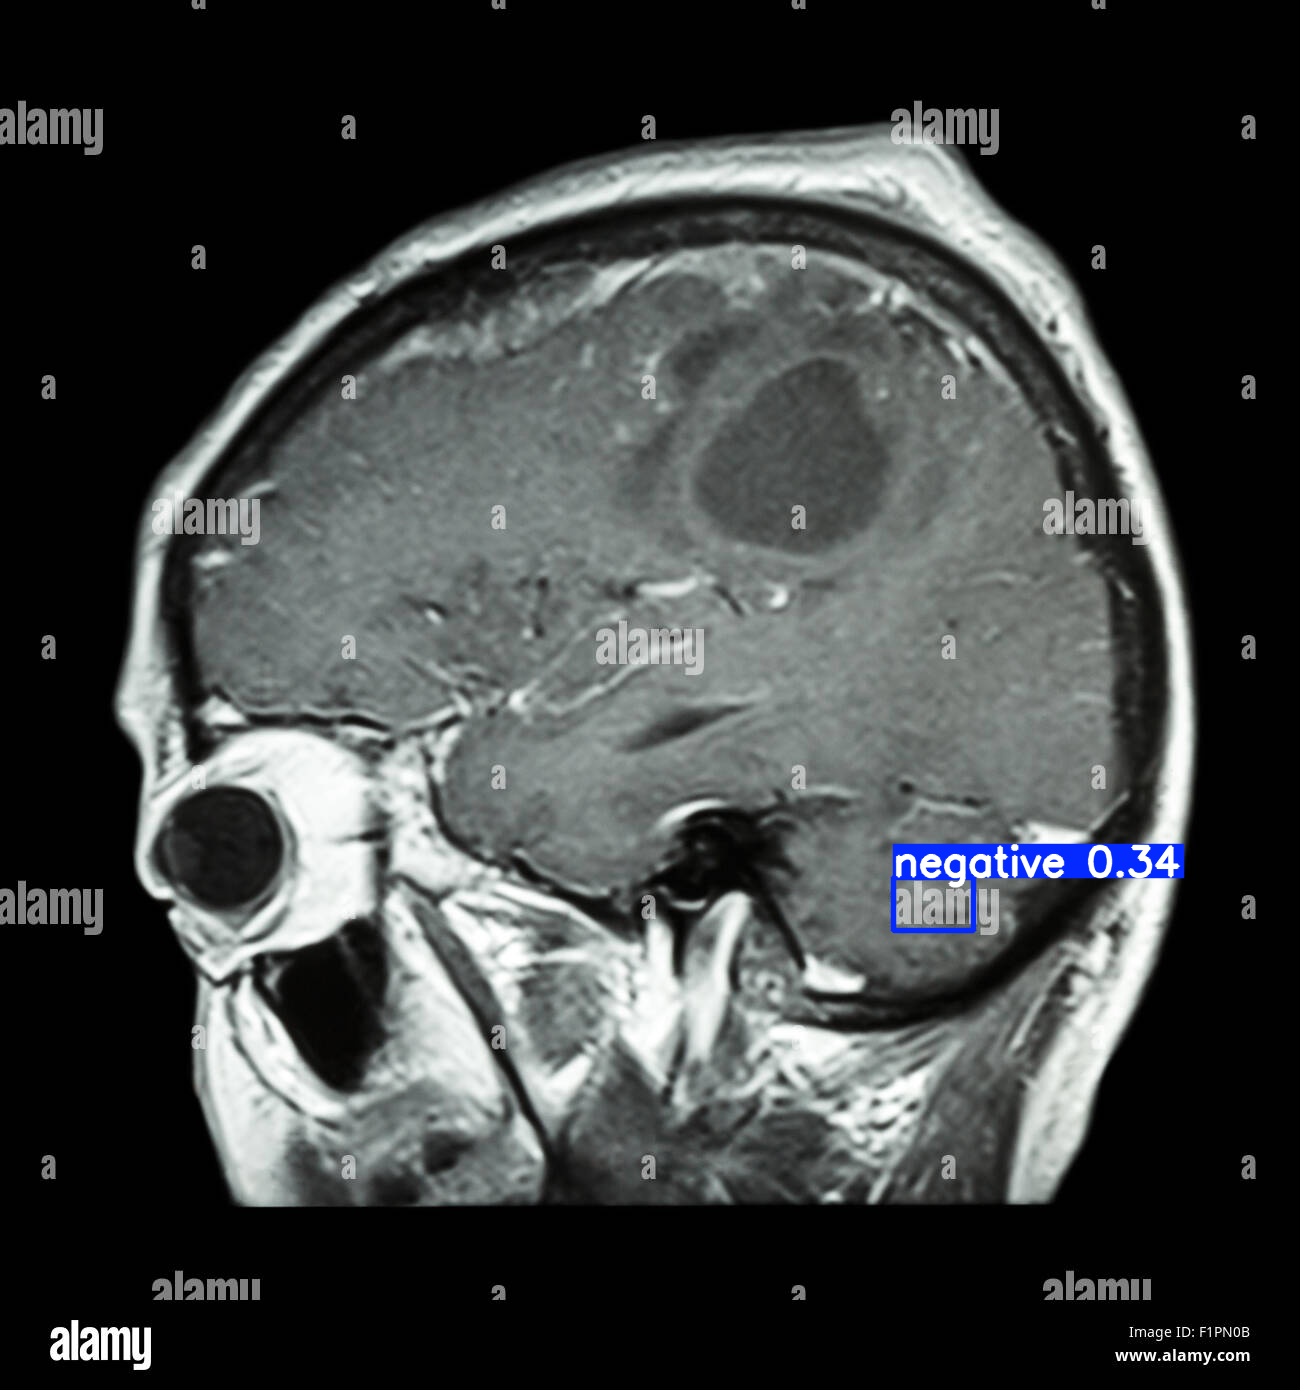

In [24]:
for result in results:
  result.show()